# Simple example of Normalization for regression

In [69]:
import numpy as np
from numpy.linalg import pinv #pseudo Inverse

file_path = 'data/house_price.txt' # Reading data from a file
data = np.loadtxt(file_path, delimiter=',')

x = data[: , 0]
idx = np.argsort(x)
X = np.zeros((41,2))
X[: , 0] =  1
X[: , 1] =  x[idx] # Creating Feature Matrix
#print(X)
y= data[: , 1]
Y = np.zeros((41,1))
Y[: , 0] =  y[idx]

tetha = np.zeros((2,1))

tetha = pinv(X)@Y # calculating Tetha using Normalization
print(tetha)
Z = X @ tetha
z = Z[: , 0]


[[988.29469769]
 [  1.16287707]]


# Ploting Data and Regression

/tmp/ipykernel_34287/602169891.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ob" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, y, "ob", marker='+' )


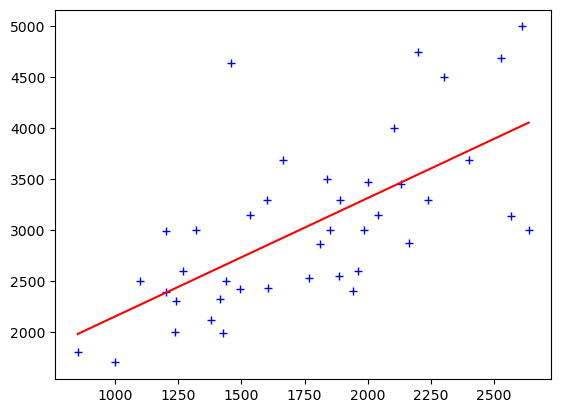

In [71]:
import matplotlib.pyplot as plt

plt.plot(x, y, "ob", marker='+' )
plt.plot(X[: , 1], z, color ='r' )



[[-4.28512781e+02]
 [ 3.70007169e+00]
 [-1.43456669e-03]
 [ 2.58125741e-07]]


/tmp/ipykernel_34287/2751174703.py:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ob" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, y, "ob", marker='+' )


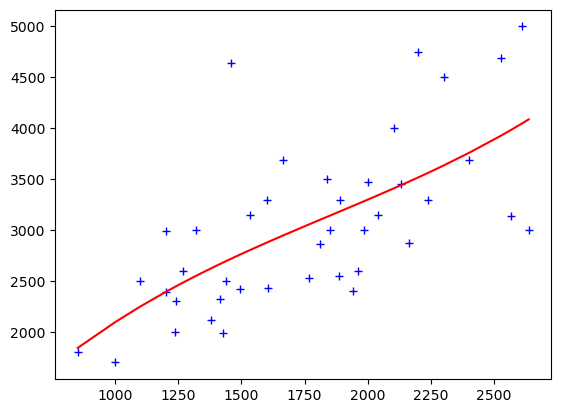

In [73]:
x = data[: , 0]
idx = np.argsort(x)
X = np.zeros((41,4))
X[: , 0] =  1
X[: , 1] =  x[idx]
X[: , 2] =  (x[idx]**2)
X[: , 3] =  (x[idx]**3) # Creating Feature Matrix

y= data[: , 1]
Y = np.zeros((41,1))
Y[: , 0] =  y[idx]

tetha = np.zeros((4,1))

tetha = pinv(X)@Y # calculating Tetha using Normalization
print(tetha)
Z = X @ tetha
z = Z[: , 0]

plt.plot(x, y, "ob", marker='+' )
plt.plot(X[: , 1], z, color ='r' )